<a href="https://colab.research.google.com/github/rida-manzoor/ML/blob/main/DBScan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Why we need DBScan?

1. We have to tell algorithm how much clusters should be there in Kmeans.
2. Kmean is very sensitive to outliers.
3. Kmean is centroid based. Can not handle different data.


Density based algorithms are algorithms that cluster data based on density of data.

DBScan ( Density Based Spatial clustering of Applications with noise)

Optics


It was proposed by Martin Ester et al. in 1996. DBSCAN is a density-based clustering algorithm that works on the assumption that clusters are dense regions in space separated by regions of lower density.

DBSCAN requires only two parameters: epsilon and minPoints. **Epsilon** is the radius of the circle to be created around each data point to check the density and **minPoints** is the minimum number of data points required inside that circle for that data point to be classified as a Core point.

In higher dimensions the circle becomes hypersphere, epsilon becomes the radius of that hypersphere, and minPoints is the minimum number of data points required inside that hypersphere.

DBSCAN creates a circle of epsilon radius around every data point and classifies them into Core point, Border point, and Noise.

1. A data point is a Core point if the circle around it contains at least ‘minPoints’ number of points.
2. If the number of points is less than minPoints, then it is classified as Border Point
3. if there are no other data points around any data point within epsilon radius, then it treated as Noise.

For locating data points in space, DBSCAN uses Euclidean distance. It also needs to scan through the entire dataset once, whereas in other algorithms we have to do it multiple times.

**Reachability** states if a data point can be accessed from another data point directly or indirectly

**Connectivity** states whether two data points belong to the same cluster or not. In terms of reachability and connectivity, two points in DBSCAN can be referred to as:

Directly Density-Reachable
Density-Reachable
Density-Connected
Let’s understand what they are.

A point X is directly density-reachable from point Y w.r.t epsilon, minPoints if,

1. X belongs to the neighborhood of Y, i.e, dist(X, Y) <= epsilon
2. Y is a core point

![akt](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/db10.png)

A point X is density-reachable from point Y w.r.t epsilon, minPoints if there is a chain of points p1, p2, p3, …, pn and p1=X and pn=Y such that pi+1 is directly density-reachable from pi.

![alt](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/db11.png)

A point X is density-connected from point Y w.r.t epsilon and minPoints if there exists a point O such that both X and Y are density-reachable from O w.r.t to epsilon and minPoints.

![alt](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/db12.png)

The value of minPoints should be at least one greater than the number of dimensions of the dataset, i.e.,

**minPoints >= Dimensions+1.**

The value of epsilon can be decided from the K-distance graph. The point of maximum curvature (elbow) in graph tells us about the value of epsilon. If the value of epsilon chosen is too small then a higher number of clusters will be created, and more data points will be taken as noise. Whereas, if chosen too big then various small clusters will merge into a big cluster, and we will lose details.

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib

In [2]:
np.random.seed(42)

# Function for creating datapoints in the form of a circle
def PointsInCircum(r,n=100):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]

In [3]:
# Creating data points in the form of a circle
df=pd.DataFrame(PointsInCircum(500,1000))
df=df.append(PointsInCircum(300,700))
df=df.append(PointsInCircum(100,300))

# Adding noise to the dataset
df=df.append([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)])

<ipython-input-3-c6b3b6b3bebb>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(PointsInCircum(300,700))
<ipython-input-3-c6b3b6b3bebb>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(PointsInCircum(100,300))
<ipython-input-3-c6b3b6b3bebb>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)])


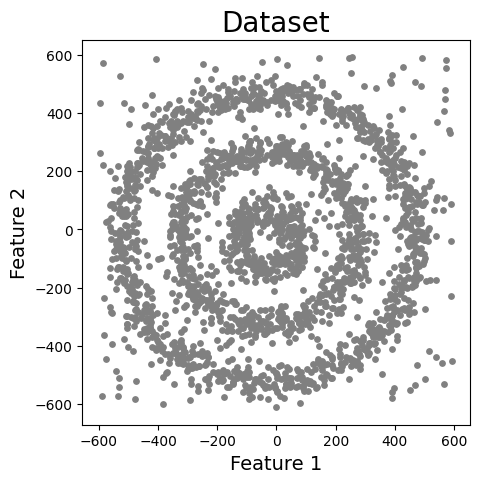

In [6]:
plt.figure(figsize=(5,5))
plt.scatter(df[0],df[1],s=15,color='grey')
plt.title('Dataset',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()


In [7]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(df[[0,1]])

DBSCAN()

In [11]:
df['DBSCAN_labels']=dbscan.labels_
df['DBSCAN_labels'].value_counts()

-1    2300
Name: DBSCAN_labels, dtype: int64

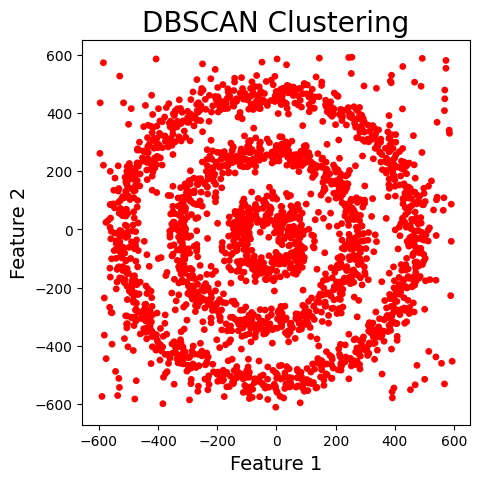

In [14]:
# Plotting resulting clusters
plt.figure(figsize=(5,5))
plt.scatter(df[0],df[1],c=df['DBSCAN_labels'],cmap=matplotlib.colors.ListedColormap(colors='red'),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [15]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df[[0,1]])
distances, indices = nbrs.kneighbors(df[[0,1]])

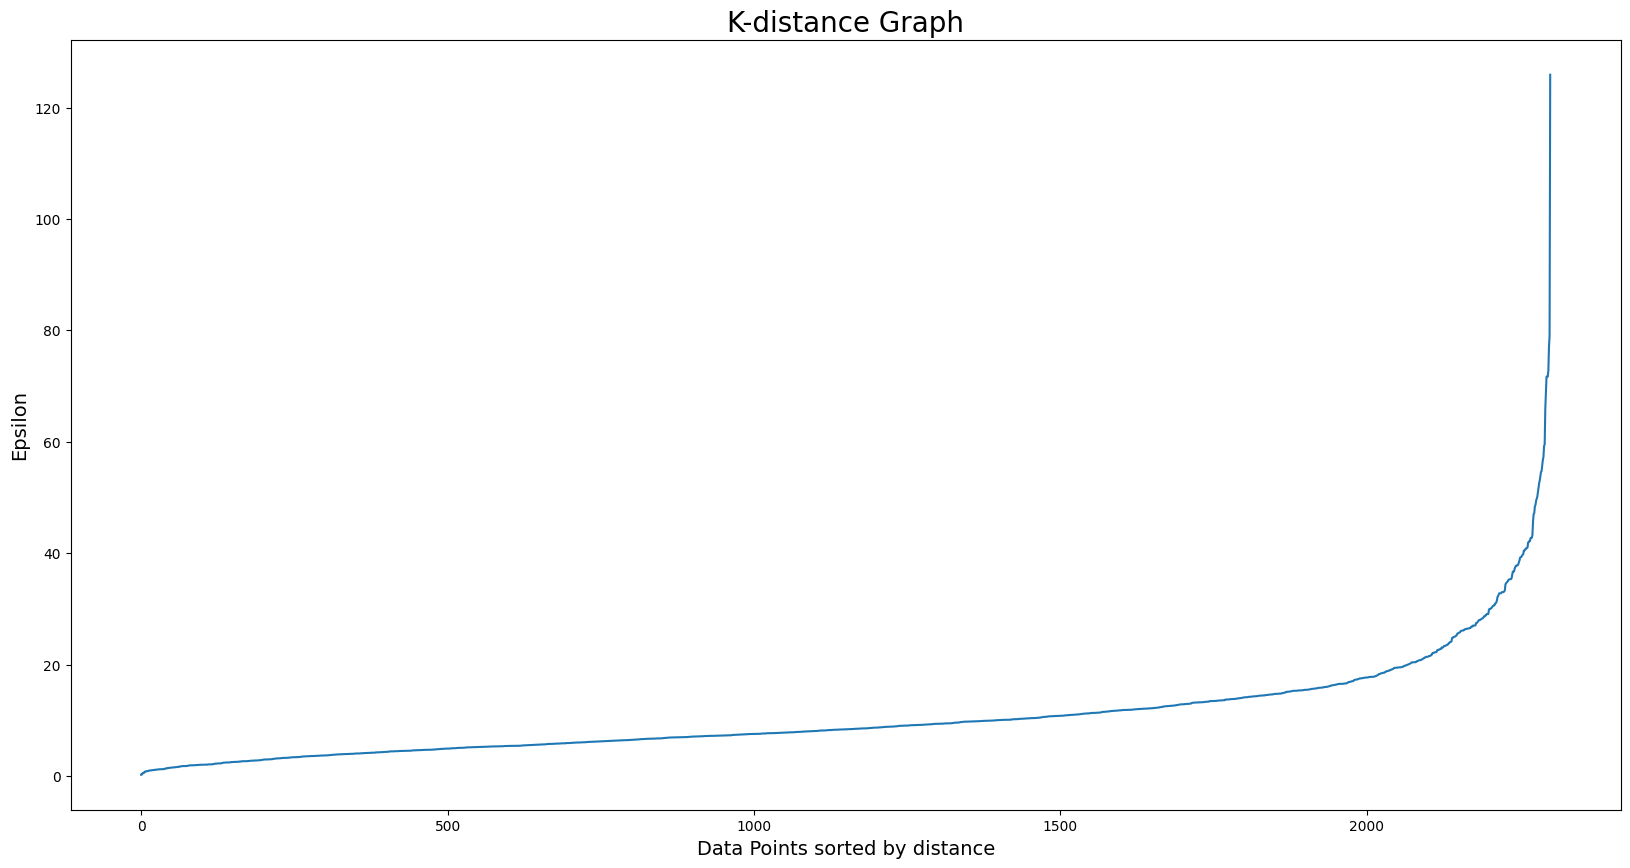

In [16]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [17]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=30,min_samples=6)
dbscan_opt.fit(df[[0,1]])

DBSCAN(eps=30, min_samples=6)

In [18]:
df['DBSCAN_opt_labels']=dbscan_opt.labels_
df['DBSCAN_opt_labels'].value_counts()

 0    1030
 1     730
 2     318
-1     222
Name: DBSCAN_opt_labels, dtype: int64

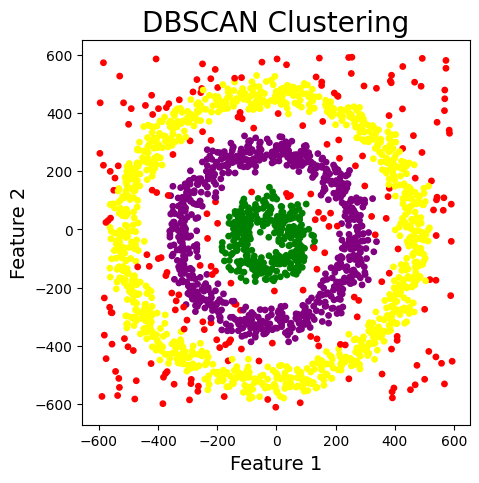

In [22]:
# Plotting the resulting clusters
plt.figure(figsize=(5,5))
plt.scatter(df[0],df[1],c=df['DBSCAN_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors=['red','yellow','purple','green']),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()